data source: https://www.kaggle.com/datasets/abcsds/pokemon?resource=download

## Exploring the Pokemon Dataset and Potential Insight Gained

This data set consists of every Pokemon released in the main series (up to generation 6), as well as their type, stats, which generation they released in, and whether they land in the "legendary" category (a status given to the rarest and strongest Pokemon in the series). For the purpose of this analyses, we will be focusing on the types and stats of each Pokemon. 

Although this is seemingly mundane, simple data, we can gain a lot of insight into potential design inspirations for future Pokemon. This could include type combinations (each Pokemon can have either 1 or 2 elemental 'types') that are less common, or specific stat niches that are rare for certain Pokemon types (ex: electric types being considered more offensive on average). Both of these broad explorations can help inspire creative and innovative designs that keep fans engaged with newer, less seen Pokemon design choices.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Pokemon.csv')

## What Each Column Represents

1. #: identification number associated with each new Pokemon (i.e. Pikachu's dex number is 0026)
2. Name: the name of the Pokemon
3. Type 1: the first elemental type of the Pokemon (i.e. fire, water, grass, etc.)
4. Type 2: the second elemental type of the Pokemon (note: will be empty for Pokemon with only 1 type)
5. Total: the total of all of a Pokemon stats combined (commonly referred to as a Base Stat Total)
6. HP: stat signifying how many health points a Pokemon has
7. Attack: stat signifying how strong a Pokemon's physical attacks are
8. Defense: stat signifying how strong a Pokemon's physical defense is
9. Sp. Atk: stat signifying how strong a Pokemon's special attacks are
10. Sp. Def: stat signifying how strong a Pokemon's special defense is
11. Speed: stat signifying how fast a Pokemon is (faster Pokemon get to move first)
12. Generation: each new Pokemon game releases under the title of a new "generation" with all new Pokemon

Important Note: in Pokemon, attacks and defense are split into "Physical" and "Special" categories for more variety. The most important part is that a Pokemon with high Attack is not the same as a Pokemon with high Sp. Atk, with the same going for Defense and Sp. Def. They fill different niches.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Important Stat Categories

Offensive Pokemon typically have high:
- Attack
- Sp. Atk
- Speed

Defensive Pokemon typically have high:
- HP
- Defense
- Sp. Def

## Questions

## 1. What is the distribution for each Pokemon type?

Here are the first 10 entries for the Pokemon dataset. 

In [5]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


To find the distribution of each type, we must take the count of every Pokemon with a Type 1, then take the count of every Pokemon with a Type 2, and combine types that are the same. NaN signifies a mono type (only one type).

In [6]:
type1 = df.groupby('Type 1')['Type 1'].count()
type2 = df.groupby('Type 2')['Type 2'].count()
typeSum = type1 + type2

print(typeSum.sort_values(ascending=False))

Type 1
Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64


As we can see, the most common types are Water, Normal, and Flying. The least common types are Ice, Fairy, and Ghost.

## 2. For the Ice type, what is the likelihood of their HP, Defense, or Sp. Def being their highest stat?

These are the stat spreads for each Ice type Pokemon.

In [7]:
ice = df[(df['Type 1'] == 'Ice') | (df['Type 2'] == 'Ice')]
iceNum = ice.shape[0]
ice[['HP','Attack','Sp. Atk','Defense','Sp. Def', 'Speed']]

,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed
94,90,70,70,80,95,70
98,50,95,85,180,45,70
133,65,50,115,35,95,95
142,130,85,85,80,95,60
156,90,85,95,100,125,85
233,55,95,35,55,75,115
238,50,50,30,40,30,50
239,100,100,60,80,60,50
243,45,55,65,45,45,75
257,45,30,85,15,65,65


Now we must find how many Ice types have HP, Defense, or Sp. Def as their highest stat.

In [8]:
highestStat = ice[['HP','Attack','Sp. Atk','Defense','Sp. Def', 'Speed']].max(axis=1)
defenseMax = ice['Defense'] == highestStat
specialDefMax = ice['Sp. Def'] == highestStat
HPMax = ice['HP'] == highestStat

defenseMaxCount = defenseMax.sum()
specialDefMaxCount = specialDefMax.sum()
HPMaxCount = HPMax.sum()
Total = defenseMaxCount + specialDefMaxCount + HPMaxCount

print(f'Out of {iceNum} Ice types, {defenseMaxCount} have Defense as their highest stat')
print(f'Out of {iceNum} Ice types, {specialDefMaxCount} have Sp. Def as their highest stat')
print(f'Out of {iceNum} Ice types, {HPMaxCount} have HP as their highest stat')
print(f'The total amount of defensive Ice types are {Total} out of {iceNum}, or {(Total / iceNum * 100).round(2)}%')

Out of 38 Ice types, 6 have Defense as their highest stat
Out of 38 Ice types, 7 have Sp. Def as their highest stat
Out of 38 Ice types, 10 have HP as their highest stat
The total amount of defensive Ice types are 23 out of 38, or 60.53%


## 3. What about their Attack, Sp. Atk, and Speed?

In [9]:
attackMax = ice['Attack'] == highestStat
specialAtkMax = ice['Sp. Atk'] == highestStat
speedMax = ice['Speed'] == highestStat

attackMaxCount = attackMax.sum()
specialAtkMaxCount = specialAtkMax.sum()
speedMaxCount = speedMax.sum()
Total2 = attackMaxCount + specialAtkMaxCount + speedMaxCount

print(f'Out of {iceNum} Ice types, {attackMaxCount} have Attack as their highest stat')
print(f'Out of {iceNum} Ice types, {specialAtkMaxCount} have Sp. Atk as their highest stat')
print(f'Out of {iceNum} Ice types, {speedMaxCount} have Speed as their highest stat')
print(f'The total amount of offensive Ice types are {Total2} out of {iceNum}, or {(Total2 / iceNum * 100).round(2)}%')

Out of 38 Ice types, 13 have Attack as their highest stat
Out of 38 Ice types, 14 have Sp. Atk as their highest stat
Out of 38 Ice types, 7 have Speed as their highest stat
The total amount of offensive Ice types are 34 out of 38, or 89.47%


The vast majority of Ice types have an offensive stat as their highest stat point, totaling at almost 90% of all Ice types. The reason for the defensive vs offensive percentage not totaling to 100% is due to overlap of highest stats. If a Pokemon had the same Defense and Attack, but both of those stats were the highest, then they are equally offensive and defensive. For an alternative view, we could remove the overlap by taking into consideration the totals of every offensive stat and defensive state for each Pokemon, rather than their individual highest stat.

### Key Takeaways

- The least common highest stat for Ice types was Defense, followed by a tie between Sp. Def and Speed
- The most common highest stat for Ice types was Sp. Atk, followed by Attack
- Overall, offensive Ice types outnumber defensive Ice types

## 4. there are 171 unique type combinations, but what type combinations are the most common? Least common?

In [18]:
typeCombinations = df.groupby(['Type 1', 'Type 2']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).reset_index(drop=True)
typeCombinations.head(20)

,Type 1,Type 2,Count
0,Normal,Flying,24
1,Grass,Poison,15
2,Bug,Flying,14
3,Bug,Poison,12
4,Ghost,Grass,10
5,Water,Ground,10
6,Steel,Psychic,7
7,Water,Flying,7
8,Bug,Steel,7
9,Fire,Fighting,7


The 3 most common type combinations are Normal Flying, Grass Poison, and Bug Flying. Those are concepts we probably want to avoid when designing future Pokemon, as those concepts have already been exploring a lot.

In [17]:
typeCombinations = df.groupby(['Type 1', 'Type 2']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).reset_index(drop=True)
typeCombinations.tail(20)

,Type 1,Type 2,Count
116,Electric,Water,1
117,Electric,Ice,1
118,Fighting,Dark,1
119,Fighting,Flying,1
120,Psychic,Ghost,1
121,Psychic,Grass,1
122,Psychic,Fire,1
123,Psychic,Dark,1
124,Poison,Dragon,1
125,Poison,Bug,1


There are a plethora of under utilized type combinations to pick from when designing an original Pokemon. Many type combinations have only been used once (some not at all), many of which sound like pretty cool ideas to iterate further. For example, Water Steel, Steel Dragon, Ice Ghost, all sound incredibly interesting to see reflected in a Pokemon design.

## 5. What is the distribution of Pokemon in regards to their highest stat? (HP, Attack, Defense, etc.)

In [25]:
highestStats = df[['HP','Attack','Sp. Atk','Defense','Sp. Def', 'Speed']].idxmax(axis=1)
statDistribution = highestStats.value_counts()
statDistribution

Attack     222
Sp. Atk    139
Defense    139
Speed      133
HP         101
Sp. Def     66
Name: count, dtype: int64

As you can see, there is a significant lack of Pokemon with Sp. Def as their highest stat. There are less than half compared to Pokemon with Defense as their highest stat (47.5%). For future Pokemon designs, they should keep this distribution in mind and pay more attention to design choices that would promote giving the Pokemon Sp. Def as its best stat. And maybe take a break from designing a lot of Attack-based Pokemon, as the Pokemon with that as their highest stat far outnumber any of the others.

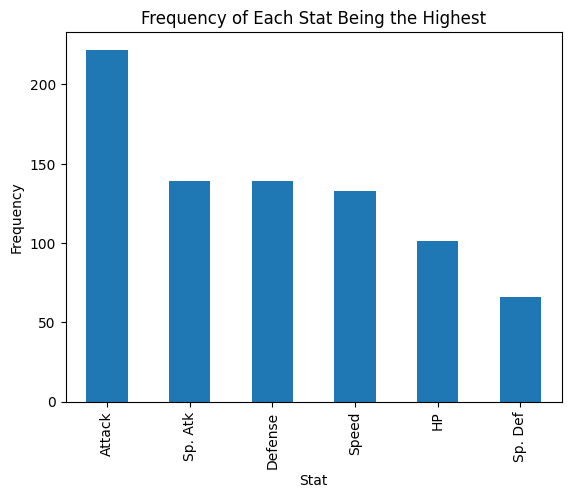

In [45]:
# Plot the stat distribution as a bar plot
statDistribution.plot(kind='bar')

# Add labels and title
plt.xlabel('Stat')
plt.ylabel('Frequency')
plt.title('Frequency of Each Stat Being the Highest')

# Display the plot
plt.show()


## 6. How has the highest Base State Total ('Total') changed across different Pokemon generations?

A common issue talked about in the community is the idea of "power creep", which is the idea that the longer the Pokemon franchise has been around, the overall power level of individual Pokemon has increased. We can investigate this concern here by taking the average of the base stat total for Pokemon in different generations. This data set only covers generations 1 through 6, but we should still be able to identify power creep as an overall issue if it exists here.

In [40]:
filteredTotalTable = df[['Total', 'Generation']][df['Total'] >= 350]
generationAvg = filteredTotalTable.groupby('Generation')['Total'].mean()
print(generationAvg)



Generation
1    489.875000
2    482.958904
3    505.936937
4    513.010989
5    490.482759
6    495.298246
Name: Total, dtype: float64


I filtered the table to only include Pokemon with a higher base stat total (BST) than 350 so that a generation with a lot of weaker, pre-evolution Pokemon wouldn't skew the results. It seems that while there is some increase in the average BST across generations, it isn't as signficant as one might think. There was a peak in generation 4 at an average BST of 513, but then the average power level decreased a bit in following generations.

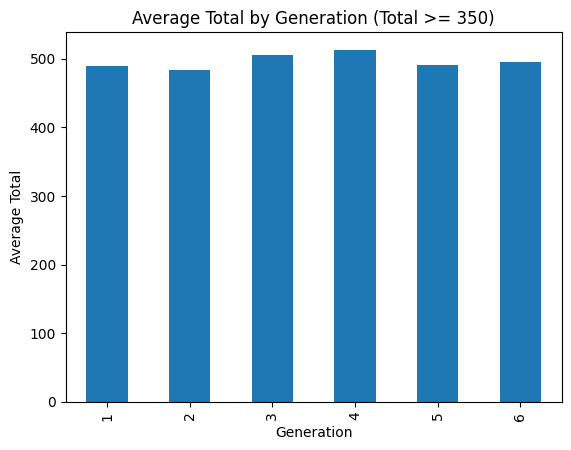

In [46]:
# Plot the data
generationAvg.plot(kind='bar')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Average Total')
plt.title('Average Total by Generation (Total >= 350)')

# Display the plot
plt.show()
